In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8-whitegrid")

df = pd.read_csv("/home/oktavianu/data/automobiles/autos.csv")
df.head()

,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9,111,5000,21,27,13495
1,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9,111,5000,21,27,16500
2,1,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9,154,5000,19,26,16500
3,2,audi,gas,std,4,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10,102,5500,24,30,13950
4,2,audi,gas,std,4,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8,115,5500,18,22,17450


In [6]:
# copying dataframe to and assign it to X for feature
X = df.copy()
y = X.pop("price") # remove price from X and assign it to y

# Label encoding for categorical
for colname in X.select_dtypes("object"): # select only objects / non numerical from x
    X[colname], _ = X[colname].factorize() # method to label the categorical 

# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = X.dtypes == int
discrete_features

symboling             True
make                  True
fuel_type             True
aspiration            True
num_of_doors          True
body_style            True
drive_wheels          True
engine_location       True
wheel_base           False
length               False
width                False
height               False
curb_weight           True
engine_type           True
num_of_cylinders      True
engine_size           True
fuel_system           True
bore                 False
stroke               False
compression_ratio     True
horsepower            True
peak_rpm              True
city_mpg              True
highway_mpg           True
dtype: bool

In [8]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores # show a few features with their mi scores

curb_weight          1.543498
horsepower           1.254180
engine_size          0.996628
highway_mpg          0.958550
city_mpg             0.859629
width                0.681841
length               0.616914
wheel_base           0.585470
make                 0.543348
bore                 0.493473
fuel_system          0.480309
peak_rpm             0.448711
stroke               0.383463
height               0.365869
drive_wheels         0.333404
num_of_cylinders     0.331337
symboling            0.228826
engine_type          0.151239
compression_ratio    0.134927
aspiration           0.087755
body_style           0.081524
fuel_type            0.047298
engine_location      0.036336
num_of_doors         0.012234
Name: MI Scores, dtype: float64

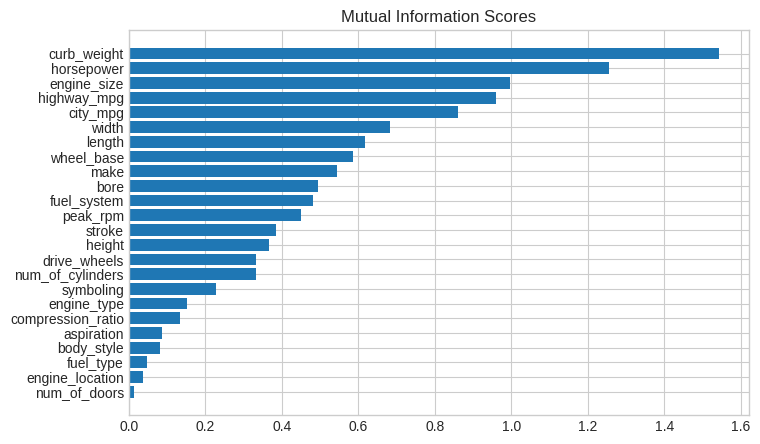

In [11]:
# barplot to make comparison easier
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

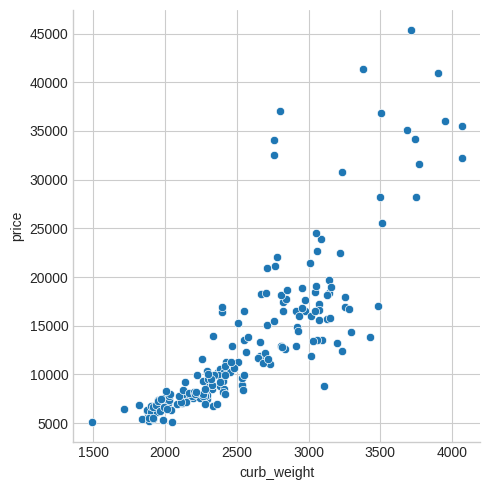

In [12]:
sns.relplot(x='curb_weight', y='price', data=df)

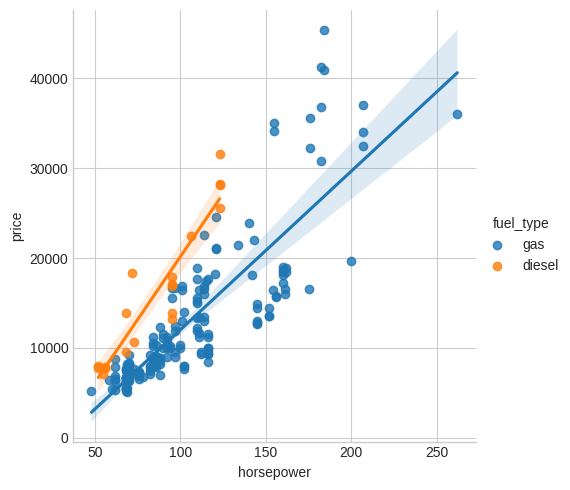

In [13]:
sns.lmplot(x="horsepower", y="price", hue="fuel_type", data=df)

In [20]:
# set matplotlib default
plt.style.use("seaborn-v0_8-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

# Load data
df = pd.read_csv("/home/oktavianu/data/ames.csv")

# utility function 
def make_mi_scores(X, y):
    X = X.copy()
    for colname in X.select_dtypes(["object", "category"]):
        X[colname], _ = X[colname].factorize()

     # All discrete features should now have integer dtypes
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mututal Information Score")

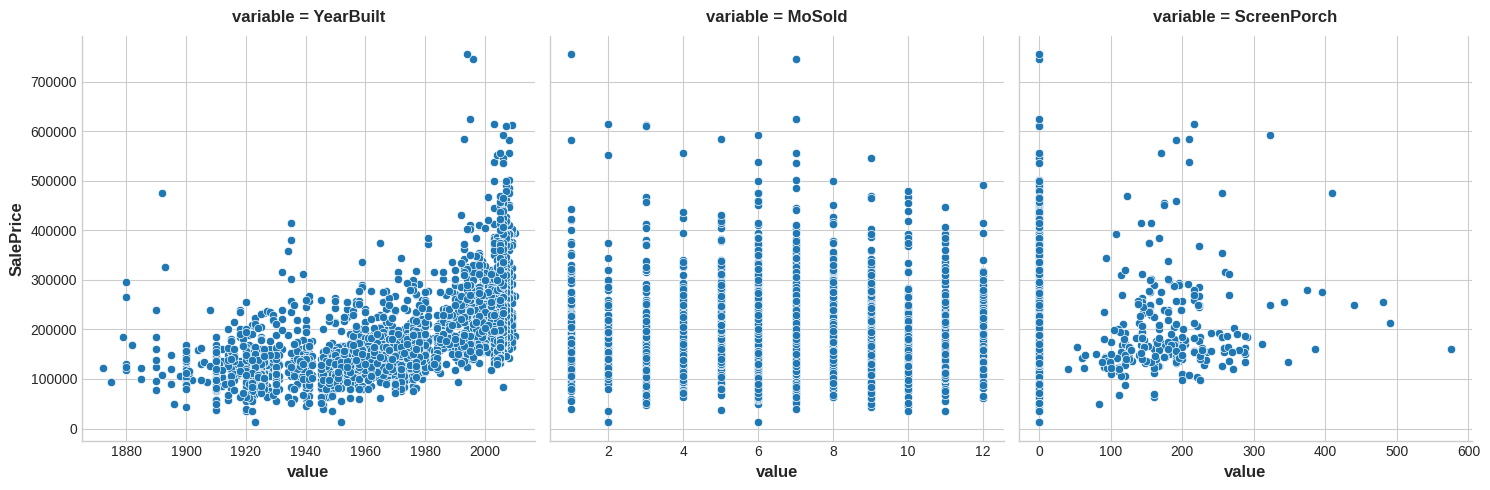

In [18]:
features = ["YearBuilt", "MoSold", "ScreenPorch"]
sns.relplot(x="value", y="SalePrice", col="variable", data=df.melt(id_vars="SalePrice", value_vars=features), facet_kws=dict(sharex=False), );

In [21]:
# The Ames dataset has seventy-eight features -- a lot to work with all at once! Fortunately, you can identify the features with the most potential.
# Use the make_mi_scores function (introduced in the tutorial) to compute mutual information scores for the Ames features:

X = df.copy()
y = X.pop('SalePrice')

mi_scores = make_mi_scores(X, y)

ExterCond           0.020934
KitchenAbvGr        0.017677
BsmtHalfBath        0.013719
LotConfig           0.013637
ScreenPorch         0.012981
PoolArea            0.012831
MiscVal             0.010997
LowQualFinSF        0.009328
Heating             0.007622
Functional          0.006380
MiscFeature         0.004322
Street              0.003381
Condition2          0.003176
RoofMatl            0.002620
PoolQC              0.001370
Utilities           0.000291
Threeseasonporch    0.000000
BsmtFinSF2          0.000000
MoSold              0.000000
LandSlope           0.000000
Name: MI Scores, dtype: float64


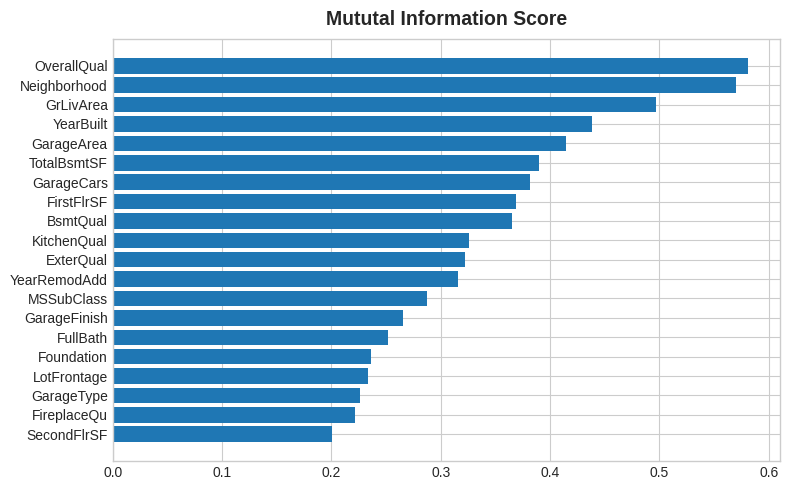

In [23]:
# print(mi_scores.head(20))
print(mi_scores.tail(20))

plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores.head(20))

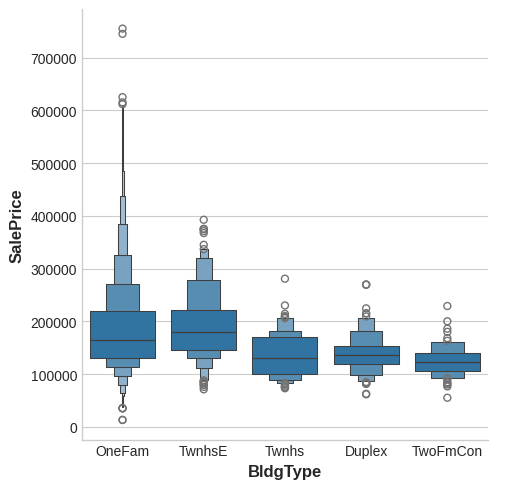

In [24]:
# The BldgType feature didn't get a very high MI score. A plot confirms that the categories in BldgType don't do a good job of distinguishing values in SalePrice (the distributions look fairly similar, in other words):

sns.catplot(x="BldgType", y="SalePrice", data=df, kind="boxen");

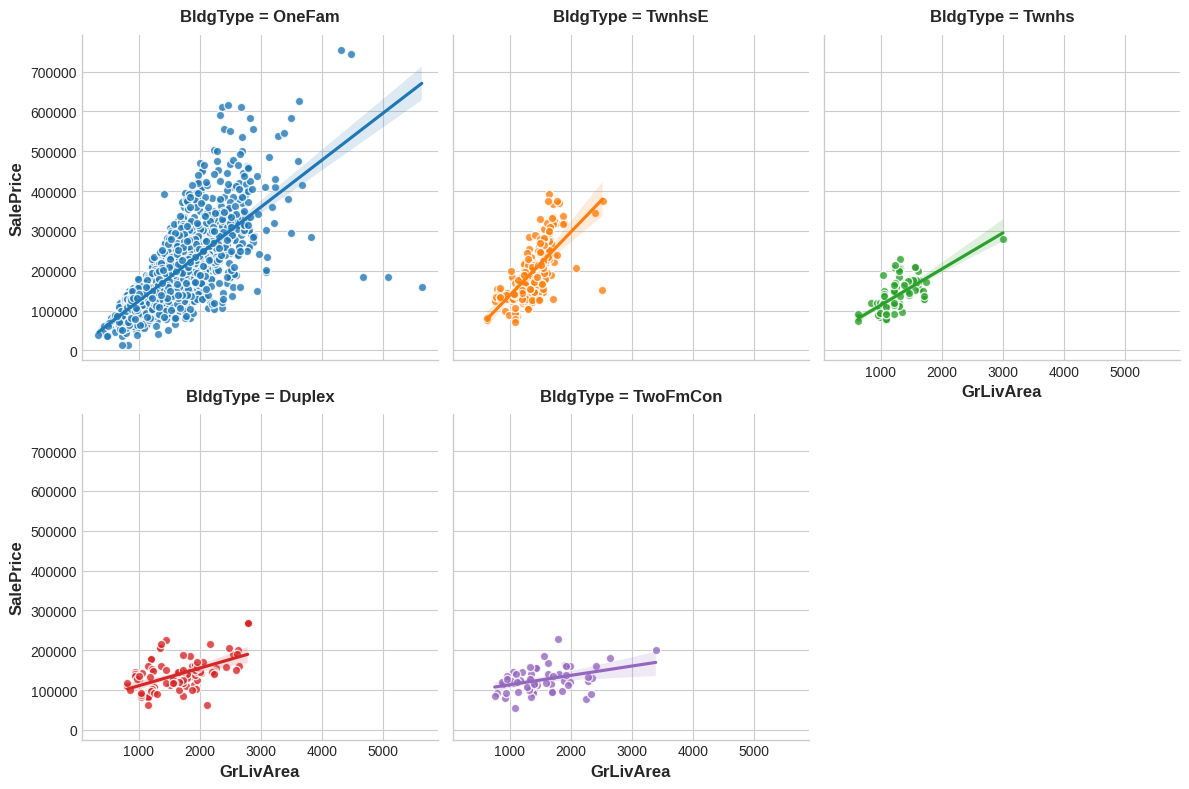

In [25]:
feature = "GrLivArea"

sns.lmplot(x=feature, y="SalePrice", hue="BldgType", col="BldgType", data=df, scatter_kws={"edgecolor": 'w'}, col_wrap=3, height=4);

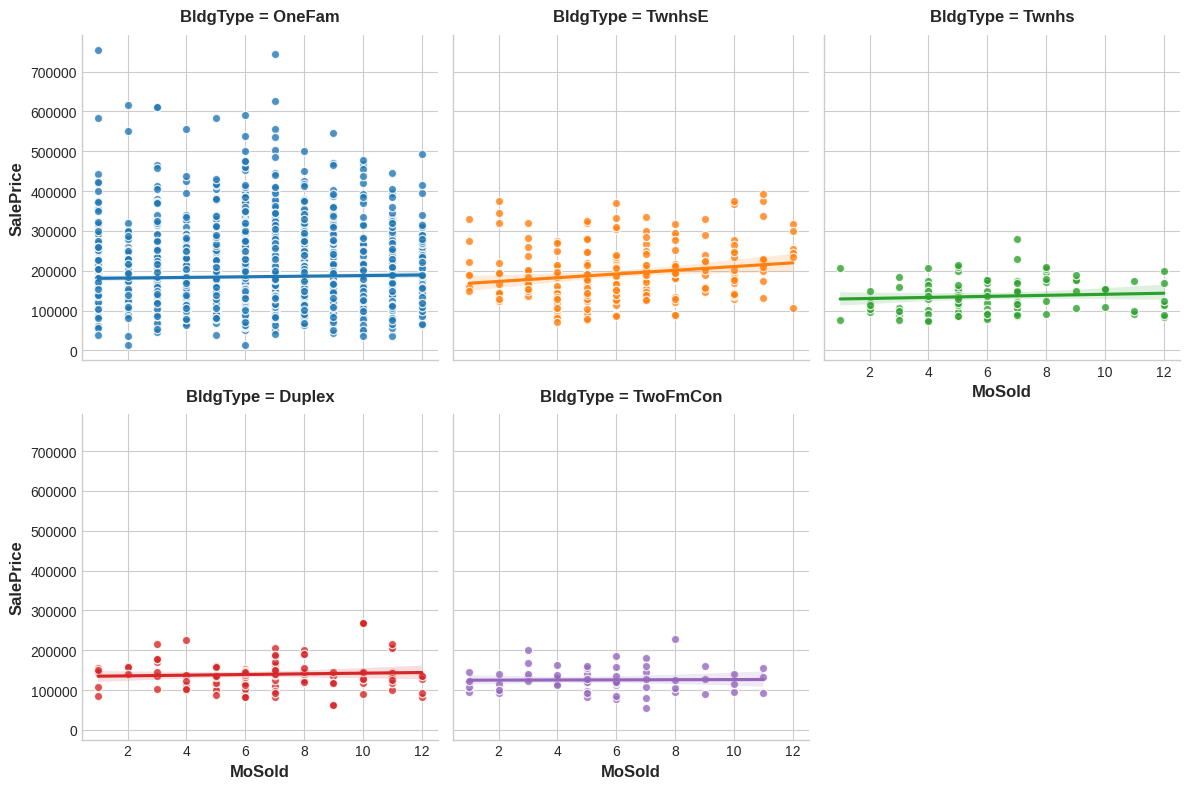

In [26]:
feature_2 = "MoSold"

sns.lmplot(x=feature_2, y="SalePrice", hue="BldgType", col="BldgType", data=df, scatter_kws={"edgecolor": 'w'}, col_wrap=3, height=4, );

In [ ]:
# Discover interactions
mi_s